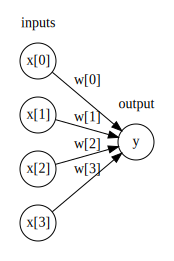

In [1]:
'''
What is Deep Learning?

Linear model for classification의 한계 
-->  명확한 인과성 및 상관성 파악과 모델의 추상화를 위해 지금까지는 직선 모형들을 사용해 왔음 
 -> 세상은 직선으로 예측하기 쉽지 않은 복잡계 
--> Nonlinear model의 등장 
--> 신경망 모델의 난제[층을 깊게 할 수 없다는 점]의 수학적 해결(By Hinton in Toronto uni)
--> 해결과 동시에 폭발적 성장(2000년 중반~ 현재까지 학계의 지배적 위치 확보 및
모든 관련 산업(IT,제조업,유통업,광물업 등등)에 핵심 알고리즘으로 탑재중)

"""

What is MLP(Multilayer Perceptrons= Feed-forward Neural Network often to be called Neural Network)?

아래의 그림 살펴보기
'''

from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

display(mglearn.plots.plot_logistic_regression_graph())

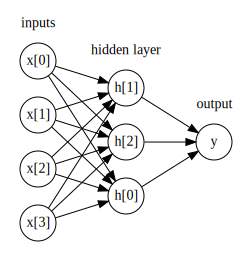

In [2]:
'''

아래 그림을 살펴 보자 

What is layer and neuron?

What is Weight and Bias ?
 
What is Activation function?

if Activation function is y=x, what happened next? --> description with some note
--> Necessity of Non-linear Activation function
'''

display(mglearn.plots.plot_single_hidden_layer_graph())

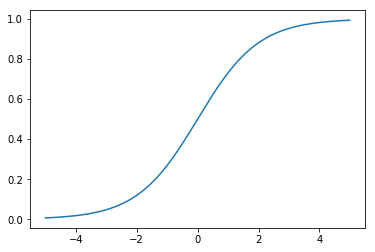

In [3]:
# Sigmoid function -> 세상에서 가장 중요한 함수 #

a = np.arange(-5,5,0.01)

def sigmoid(x):
    return 1 / (np.exp(-x)+1)
    
b = sigmoid(a)

plt.plot(a,b,label = 'sigmoid')

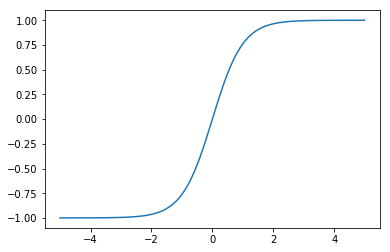

In [4]:
'''
Activation function의 조건 --> X가 증가하면 y도 증가하여야 한다 

MLP와는 다르게 은닉층이 많아지게 되는 Deep Neural Network는 "Backpropagation(with Gradient Descent Technique)" 기법을 사용하며
이 상황에서'Vanishing Gradient Problem'이 발생한다.

---------------------------------------------------------------------------------
cf) Gradient Descent and SGD conception

Gradient Descent is the process of minimizing a function by following the gradients of the cost function
This involves knowing the form of the cost as well as the derivative so that from a given point you know the gradient 
and can move in that direction, e.g. downhill towards the minimum value

In machine learning, we can use a technique that evaluates and updates the coefficients every iteration called
Stochastic Gradient Descent to minimize the error of a model on our training data.

The way this optimization algorithm works is that each training instance is shown to the model one at a time.
The model makes a prediction for a training instance, the error is calculated 
and the model is updated in order to reduce the error for the next prediction
---------------------------------------------------------------------------------------

'Vanishing Gradient Problem'을 풀기 위해 다른 Activation function이 사용'
''' 

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))


b2 = tanh(a)

plt.plot(a,b2,label = 'tanh')

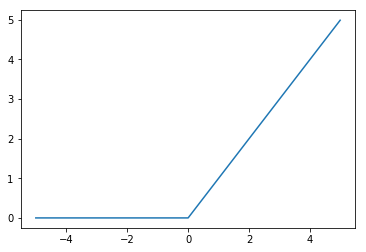

In [5]:
def relu(x):
    return abs(x) * (x>0)
    
b3 = relu(a)
plt.plot(a,b3,label = 'relu')

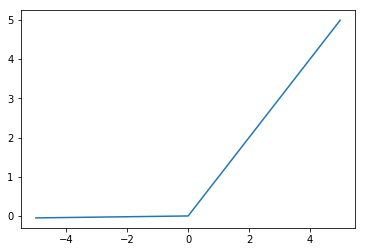

In [6]:
def Leakyrelu(x,alpha):
    return np.where(x>0,x,x*0.01)
    
b4 = Leakyrelu(a,alpha=0.01)
plt.plot(a,b4,label = 'Leakyrelu')

Text(0,0.5,'feature 1')

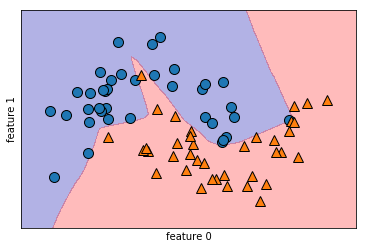

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise=0.25,random_state=3)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y, random_state =3) # stratify 인자

mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train) 
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

In [9]:
mlp # Check Default value in mlp 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)



Text(0,0.5,'feature 1')

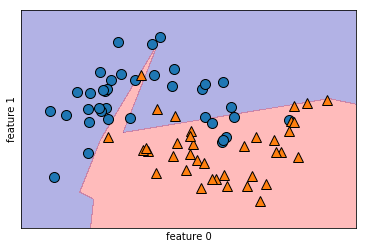

In [15]:
# Hidden layer size : [100] -> [10] #
mlp2 = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [10])
mlp2.fit(X_train,y_train)
print(mlp2)
print()
mglearn.plots.plot_2d_separator(mlp2,X_train,fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0,0.5,'feature 1')

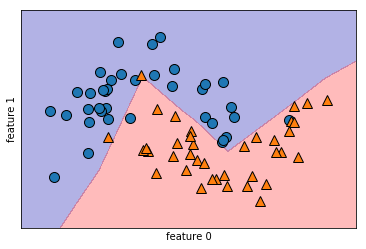

In [14]:
# Hidden Layer sizes = [100] -> [10,10] #

mlp3 = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [10,10])
mlp3.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp3,X_train,fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0,0.5,'feature 1')

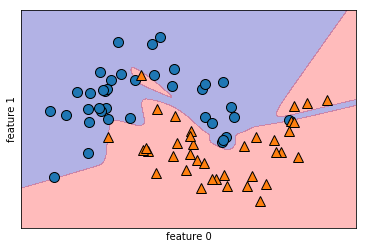

In [16]:
# Activation function : Relu -> tanh  / Hidden Layer sizes = [100] -> [10,10] #

mlp4 = MLPClassifier(solver='lbfgs',random_state=0,activation = 'tanh',hidden_layer_sizes = [10,10])
mlp4.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp4,X_train,fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

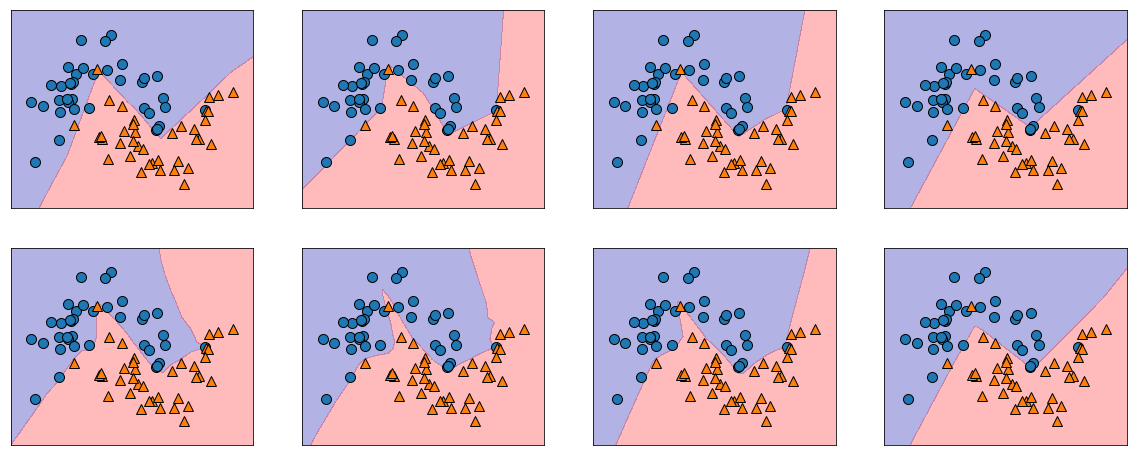

In [28]:
fig,axes = plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp = MLPClassifier(solver='lbfgs',random_state=0,
                            hidden_layer_sizes = [n_hidden_nodes, n_hidden_nodes],
                           alpha = alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True, alpha = 0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)        

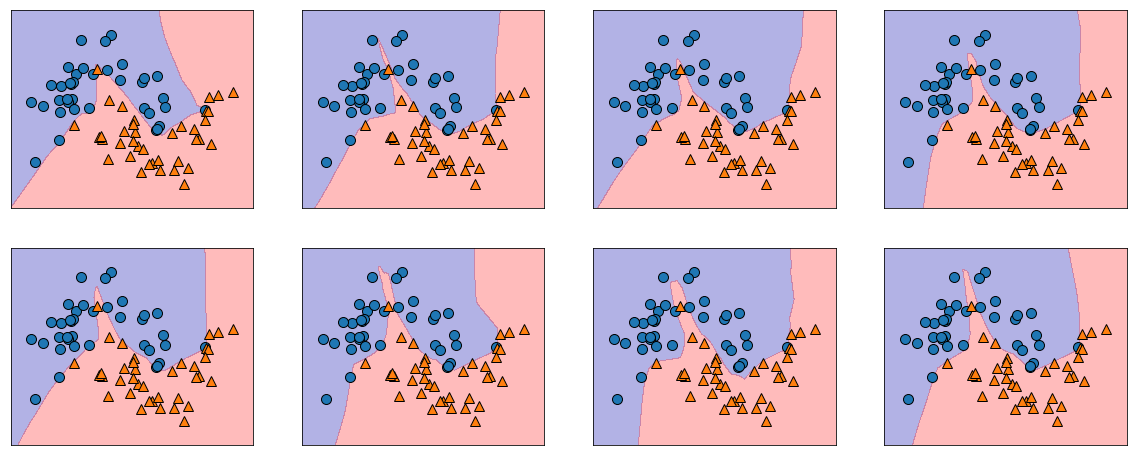

In [29]:
fig,axes = plt.subplots(2,4,figsize=(20,8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs',random_state=i,
                        hidden_layer_sizes = [100,100])
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3,ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)

In [33]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer.data.max(axis=0)

array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 3.454e-01,
       4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
       2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
       7.895e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
       2.226e-01, 1.058e+00, 1.252e+00, 2.910e-01, 6.638e-01, 2.075e-01])

In [35]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print("train accuracy : {}".format(mlp.score(X_train,y_train)))
print("test accuracy : {}".format(mlp.score(X_test,y_test)))

train accuracy : 0.9061032863849765
test accuracy : 0.8811188811188811


In [39]:
# Data Scaling : StandardScaler #

mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)

print("train accuracy : {}".format(mlp.score(X_train_scaled,y_train)))
print("test accuracy : {}".format(mlp.score(X_test_scaled,y_test)))

train accuracy : 0.9906103286384976
test accuracy : 0.965034965034965


c:\users\sysoft1123b\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
# max_iter : 200 -> 10000000000000000 #

mlp2 = MLPClassifier(random_state=0,max_iter = 10000000000000000)
mlp2.fit(X_train_scaled,y_train)

print("train accuracy : {}".format(mlp2.score(X_train_scaled,y_train)))
print("test accuracy : {}".format(mlp2.score(X_test_scaled,y_test))) 

# 과대 적합? #

train accuracy : 0.9929577464788732
test accuracy : 0.972027972027972


In [44]:
# max_iter : 200 -> 100000 / alpha = 0.01 -> 1 #

mlp3 = MLPClassifier(random_state=0,alpha=1,max_iter = 100000)
mlp3.fit(X_train_scaled,y_train)

print("train accuracy : {}".format(mlp3.score(X_train_scaled,y_train)))
print("test accuracy : {}".format(mlp3.score(X_test_scaled,y_test))) 

train accuracy : 0.9882629107981221
test accuracy : 0.972027972027972


Text(0,0.5,'input feature')

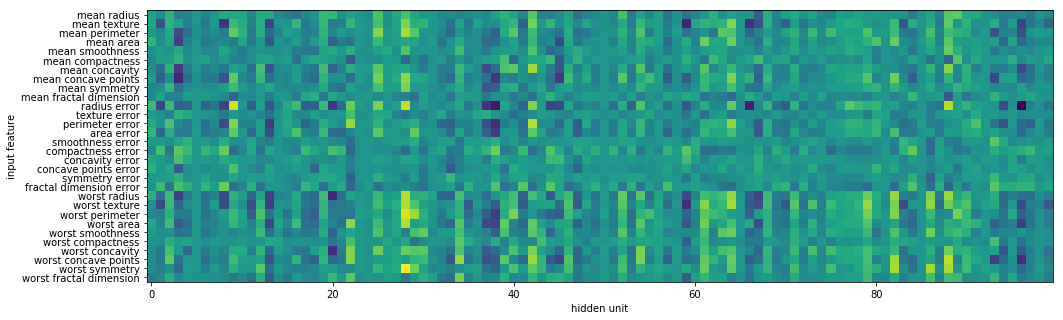

In [50]:
# 입력층과 은닉층([100]) 사이의 학습된 가중치 #

%matplotlib inline

plt.figure(figsize=(20,5))
plt.imshow(mlp3.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('hidden unit')
plt.ylabel('input feature')

In [54]:
# 입력층과 은닉층([100]) 사이의 학습된 가중치 #

%matplotlib inline

plt.figure(figsize=(20,5))
plt.imshow(mlp3.coefs_[1],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('hidden unit')
plt.ylabel('input feature')

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [58]:
pd.DataFrame(mlp3.coefs_[0]) # Weight from Input-layer to output-layer #

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.019389,-0.014212,0.041743,-0.034727,-0.023830,-2.056323e-08,-0.028849,-0.000539,0.030848,0.025142,...,0.030586,0.029014,-0.003471,-0.010853,-0.033779,-0.028902,-0.020091,-0.046283,0.000013,-0.022666
1,0.023808,-0.092634,0.043143,0.019641,-0.025956,-7.471731e-09,-0.038506,0.005913,-0.125873,0.053244,...,0.043399,-0.002570,0.000909,0.034268,-0.040913,0.008426,-0.111414,-0.045634,-0.016789,-0.068830
2,0.005263,-0.016467,0.025511,-0.098473,-0.049963,-5.364962e-03,-0.026253,-0.008945,-0.035069,0.079540,...,0.030832,-0.014143,0.005666,-0.090194,-0.023283,-0.025463,-0.095254,-0.002649,0.010184,0.000767
3,0.044370,-0.011789,0.020542,-0.115045,-0.024050,-5.225622e-05,-0.036542,-0.025046,-0.019463,-0.034423,...,0.007919,0.016679,0.001841,0.015490,-0.058960,0.020248,-0.061995,-0.028000,-0.016070,-0.018097
4,-0.002766,0.009137,-0.005378,0.029957,-0.014603,-4.239058e-08,-0.018761,-0.020612,0.022927,-0.010162,...,-0.000147,0.016308,0.005611,-0.037178,-0.009342,-0.021033,-0.005789,-0.019764,0.000122,0.009170
5,-0.020734,0.008285,0.009084,0.042089,-0.004812,4.972717e-03,0.017208,-0.013671,0.003238,-0.024734,...,-0.011717,0.028597,0.000064,0.005668,0.000560,0.037893,-0.014898,0.011921,0.001066,0.021651
6,-0.008083,-0.054108,0.042245,-0.120399,-0.032387,-2.441065e-08,-0.031887,-0.015753,-0.036439,0.019651,...,0.041616,-0.027457,0.003278,-0.033577,-0.037799,-0.007113,-0.100383,-0.051850,-0.000574,-0.028027
7,0.009191,-0.070976,-0.009328,-0.140406,-0.053538,-3.086195e-03,-0.043420,-0.035563,-0.093369,0.078141,...,0.036034,0.002497,0.003983,-0.105108,0.017181,0.021075,-0.065581,-0.045785,-0.002631,-0.027545
8,-0.022485,-0.008989,0.046367,-0.051081,-0.012960,4.870583e-07,-0.006658,-0.003169,0.015762,0.053305,...,0.028616,0.015460,0.001567,-0.016917,-0.012929,-0.018326,0.017919,-0.017730,-0.001323,0.001922
9,-0.012693,0.013415,-0.028426,-0.026806,0.014069,4.279557e-03,0.009504,0.001147,-0.015512,-0.068343,...,-0.043920,-0.011844,-0.001753,0.043413,0.013283,-0.005864,0.005139,0.022373,0.000280,-0.003676


In [59]:
pd.DataFrame(mlp3.coefs_[1]) # Bias

,0
0,-0.111881
1,0.230919
2,-0.193499
3,0.298328
4,0.151737
5,-0.001772
6,0.166096
7,0.093366
8,0.280634
9,-0.264603


In [ ]:
'''
Scikit-Learn의 한계점 : 151pp 첫번째 단락

Tuning : 151pp~152pp

'''